# Final project

### The task

Your task is to: identify an interesting problem that's addressable with the help of computational methods applied to the supplied corpus, formulate a hypothesis about that problem, devise an experiment or experiments to test your hypothesis, present the results of your investigations, and discuss your findings.

This workflow essentially replicates the process of writing an academic paper. You can think of your exam as a paper in miniature.

You are free to present each of these tasks as you see fit. You should use narrative text (that is, your own writing in a markdown cell), citations of others' work, numerical results, tables of data, and static and/or interactive visualizations as appropriate. Total length is flexible and depends on the number of people involved in the work, as well as the specific balance you strike between the ambition of your question and the sophistication of your methods. But be aware that numbers never, ever speak for themselves. Quantitative results presented without substantial discussion will not earn high marks.

Your project should reflect, at minimum, ten **or more** hours of work, though you will be graded on the quality of your output, not the amount of time it took you to produce it. Most high-quality projects represent twenty or more hours of work.

#### Pick an important and interesting problem!

No amount of technical sophistication will overcome a fundamentally uninteresting problem at the core of your work. You have seen many pieces of successful computational humanities research over the course of the semester. You might use these as a guide to the kinds of problems that interest scholars in a range of humanities disciplines. You may also want to spend some time in the library, reading recent books and articles in the professional literature. **Problem selection and motivation are integral parts of the project.** Do not neglect them.

### The corpus

We have supplied you (via the course GitHub site) with a corpus of 1,540 volumes of American fiction published between 1789 and 1875, as well as a range of potentially relevant metadata. This corpus is large: it contains well over 100 million words. Some summary and descriptive statistics are included below, along with a short annotation of the metadata fields.

**Be aware that some (but certainly not all) text analysis tasks will be slow (or impossible) when run over a corpus as large as this one.** For comparison purposes, the subsampled album review dataset we used for homework 8 contained about 1% as many words (but a similar number of total documents). You might consider whether or not your question requires the use of the full corpus.

Books in the corpus are those that were included in volumes 1 and 2 of Lyle Wright's three-volume bibliography of American fiction before 1900 and that were digitized by the University of Virginia (1789-1850) and Indiana University (1851-1875). This corpus includes about 40% of the American fiction from the period (1789-1875) that has been preserved in American academic libraries. You might think a little about what kinds of books are most likely to have found their way first into print and then into academic libraries, and what kinds of books (and authors) might not have.

Metadata were collected manually by a team of undergraduate students at the University of Notre Dame.

**Note that the nineteenth century was awful.** These books reflect that fact in all kinds of ways, even though (or maybe because) they were generally considered unproblematic at the time. If you read the books or dig very far into the most informative features, you will quickly discover objectionable content. It would be valuable to devise (and you will be rewarded for devising) methods to avoid displaying unmasked versions of racial slurs, for example, in any visualization that might otherwise include them.

### Format

You should submit your exam as a report in the form of a Jupyter notebook that includes all code, figures, and write-up.

Your report should have four basic sections (provided in cells below for ease of reference and reuse):

1. **Introduction and hypothesis.** What problem are you working on? Why is it interesting and important? What have other people said about it? What do you expect to find?
2. **Corpus, data, and methods.** What data have you used? What are the limitations of that data? What major methods will you use to analyze it? Why are those methods the appropriate ones?
3. **Results.** What did you find? How did you find it? How should we read your figures? Be sure to include confidence intervals or other measures of statistical significance or uncetainty where appropriate.
4. **Discussion and conclusions.** What does it all mean? Do your results support your hypothesis? Why or why not? What are the limitations of your study and how might those limitations be addressed in future work?

Within each of those sections, you may use as many code and markdown cells as you like. You may, of course, address additional questions or issues not listed above. You may also gather additional data or metadata relevant to your analysis, but you are not required to do so.

All code used in the project should be present in the notebook (except for widely-available libraries that you import), but **be sure that we can read and understand your report in full without rerunning the code**. Unexecuted code will receive no credit. Be sure, too, to explain what you're doing along the way, both by describing your data and methods and by writing clean, well commented code.

### Grading

This exam is the take-home final for the course. It is worth 35% of your overall grade. You will be graded on the quality and ambition of each aspect of the project. No single component is more important than the others.

### Practical details

* The exam is due at **noon on Saturday, December 9** via upload of a single, fully executed Jupyter notebook file to CMS.
* **You must work alone.** You may not collaborate with others.
    * You may post questions on Ed, but should do so privately (visible to course staff only).
* Interactive visualizations do not always work when embedded in shared notebooks. If you plan to use interactives, you may need to host them elsewhere and link to them.

---

## 1. Introduction and hypothesis

I will work on <b>the relationship between the authors' occupations and their writing</b>, specifically, <b>how authors whose primary occupation as Church, Politics-Government-Activism and Law could potentially relate</b>. This is an interesting question because, between 1789 and 1875, the founding years of the United States, the churches played a central role in American lives and the church figures had a significant presence across the country. They provided spiritual guidance and shaped religious beliefs for people and communities. They played a central role in influencing social norms and values and advocating for politically-related things such as abolitionism. The legal frameworks are also influenced by church and religious beliefs. The close relationship between Politics-Government-Activism and Law is explicit, as these two things are inherently relevant. I am interested in whether texts written by people working in the field of Politics-Government-Activism and Law reflect the religious influence, and whether writers from church backgrounds write about Politics-Government-Activism and Law.

Questions I will ask throughout the project are: Are writers' occupations and real-world experience reflected in their writing? Do writers with occupations in church address issues in Politics-Government-Activism and Law within their written works, and do authors in Politics-Government-Activism and Law have religious impacts in their writing? How do we distinguish texts written by authors in Politics-Government-Activism and Law? What are the top word choices they use that indicate the mutual influence? Could we predict the author's occupation (Politics-Government-Activism, Law, or Church) based on their writing? The ultimate goal of this project is to train a model to predict the writer's occupation based on the writing using LLM-based model, and maximum accuracy is desired.

For this project, I expect to find that writers who share similar occupations and prefer writing similar topics and use similar words. I also expect to find high accuracies to predict the author's occupation through their pieces of writing. If successful, this project could have a meaningful extension to the modern world in exploring writing preference similarities between authors who have occupations in similar areas and different occupations are closely interrelated that are reflected in their writing.


## 2. Data and methods

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip install transformers[torch]

In [3]:
!pip install accelerate -U

In [4]:
# Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fightinwords as fw
import random
from collections import Counter
from nltk import word_tokenize
from   sklearn.linear_model import LogisticRegression
from   sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support, classification_report
from sklearn.naive_bayes import GaussianNB
from   transformers import DistilBertTokenizerFast, DistilBertModel, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from torch.utils.data import DataLoader
from   collections import defaultdict
import seaborn as sns

In [5]:
# File locations
#   Note that metadata are supplied as a TSV file
#   Text files are in a directory, one file per (long, novel-like) document
metadata_file = os.path.join('data', 'us_fiction', 'corpus_data.tsv')
text_dir      = os.path.join('data', 'us_fiction', 'us_texts')

In [6]:
# Load the metadata
metadata = pd.read_csv(
    metadata_file,
    sep='\t',
    low_memory=False
).set_index('source_id')

### Corpus details

The cells below are supplied to help you understand the corpus. **You should remove them from your completed exam** and include only the information you deem relevant to your report. That said, you are free to keep the metadata-loading code above and you may copy any and all of the other code below for your own purposes.

In [7]:
# Glance at the metadata
metadata.head()

,author,title,pub_place,publisher,pub_date,gender,gender_guess,ethnicity,occupation,occupation_free,state_born,state_main,state_died,born,died,words
source_id,,,,,,,,,,,,,,,,
eaf001,"Allston, Washington",Monaldi,Boston,C. C. Little and J. Brown,1841,M,0.0,White,Arts,Painter,SC,MA,MA,1779.0,1843.0,47541
eaf002,"Bacon, Delia Salter",Tales of the puritans,New Haven [Conn.],A. H. Maltby,1831,F,0.0,White,Education,Teacher,OH,CT,CT,1811.0,1859.0,70010
eaf003,"Bacon, Delia Salter",Love's martyr,Cincinnati,Printed by E. Morgan and Co.,1838,F,0.0,White,Education,Teacher,OH,CT,CT,1811.0,1859.0,13547
eaf004,"Bacon, Delia Salter",The bride of Fort Edward,New York,Samuel Colman,1839,F,0.0,White,Education,Teacher,OH,CT,CT,1811.0,1859.0,34309
eaf005,"Belknap, Jeremy",The foresters,Boston,Printed by I. Thomas and E. T. Andrews,1792,M,0.0,White,Church,Minister,MA,NH,MA,1744.0,1798.0,33731


In [8]:
# Summary stats for numeric columns
metadata.describe()

,pub_date,gender_guess,born,died,words
count,1540.000000,1425.000000,1188.000000,1165.000000,1.540000e+03
mean,1853.963636,0.197193,1811.624579,1878.185408,7.584156e+04
std,15.764799,0.398019,17.669353,22.077845,5.916979e+04
min,1789.000000,0.000000,1744.000000,1793.000000,1.667000e+03
25%,1845.000000,0.000000,1804.000000,1860.000000,4.820550e+04
50%,1855.000000,0.000000,1811.000000,1881.000000,6.927450e+04
75%,1867.000000,0.000000,1823.000000,1893.000000,9.377150e+04
max,1875.000000,1.000000,1857.000000,1934.000000,1.150556e+06


### Field definitions and distributional stats

Most of the metadata fields are self-explanatory, but here are some details. Note that not every field in the metadata is described below.

* `source_id`: This is the name of the file corresponding to the volume. You can use it to match metadata records to full-text documents. Note that the corpus includes a nontrivial number of multivolume works. These volumes have `source_id`s like `eaf086v1` or `Wright2-1720v2`.
* `gender`: Author gender. `M`, `F`, or  `NaN` (= unknown).
* `gender_guess`: Was the author gender assignment determined by biographical research (`0`) or by guessing on the basis of the author's name (`1`)?
* `ethnicity`: Author ethnicity. One of `White`, `Black`, `Native`, or `NaN` (= unknown). Always assigned via biographical research. Not very useful, as the values are almost exclusively `White` or `NaN`. This fact tells you something about the US literary field in the nineteenth century.
* `occupation` and `occupation_free`: The author's primary employment identification. Recall that the US in the nineteenth century didn't always have a large market for novels, so many of the authors in the corpus made their living by other means. The difference between these fields is that `occupation` uses a fixed vocabulary, while `occupation_free` does not (so includes more detailed or fine-grained information).
* `state_*`: The state in which the author was `born`, `died`, and with which they are conventionally associated (`main`).
* `born` and `died`: Year of the author's birth and death, respectively, where known.

In [9]:
# Occurrence counts for selected metadata fields
for col in ['occupation']:
    display(metadata[col].value_counts())
    print()

Editor-Critic-Journalist        217
Writer                          187
Education                       147
Politics-Government-Activism    136
Church                          121
Military-Seafaring               72
Law                              57
Business-Trade                   33
Medicine                         28
Arts                              6
Agriculture-Land                  6
Name: occupation, dtype: int64

In [10]:
# Distribution of publication dates
# metadata.pub_date.plot.hist(bins=metadata.pub_date.max()-metadata.pub_date.min()+1);

In [11]:
# Distribution of volume lengths
#   Note removal of long volumes from vis
# metadata.loc[metadata.words.between(0,250000)].words.plot.hist(bins=100);

In [12]:
# Step 1: process texts, remove redundant rows, and put labels and texts into lists
texts_directory = 'data/us_fiction/us_texts'
file_names = os.listdir(texts_directory)

filtered_md = metadata[metadata.index.isin(file_names)]

print("Shape of the processed dataframe:", filtered_md.shape)

Shape of the processed dataframe: (927, 16)


In [13]:
# counts for each occupation
print("\nCounts for each occupation:")

occp=['Law','Church', 'Politics-Government-Activism']
fmd = filtered_md[filtered_md['occupation'].isin(occp)]
fmd.occupation.value_counts()


Counts for each occupation:


Politics-Government-Activism    55
Church                          33
Law                             25
Name: occupation, dtype: int64

Based on the output, there are 58 texts from authors in Politics-Government-Activism, 33 texts from authors in Church, 27 texts fro authors in Law. It's a pretty small corpora and the number of texts for each occupation differs, though not a lot. This corpus is still usable for my analysis.

In [14]:
# process all occupations and put them into list
labels = []
for item in fmd['occupation'].items():
    labels.append(item[1])

In [15]:
# index list for texts
labels_index = []

for item in filtered_md['occupation'].items():
    if str(item[1]) in ["Church", "Law", "Politics-Government-Activism"]:
        labels_index.append(item[0])

In [16]:
# process texts from the indices that contain a valid occupation
texts = {}
file_names = []
file_path = ''
for file_name in os.listdir(texts_directory):
    if file_name in labels_index:
        file_path = os.path.join(texts_directory, file_name)
        file_names.append(file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            texts[file_name] = text

print("Preview of the processed text:")
first_key = next(iter(texts))
first_value = next(iter(texts.values()))
print(first_key)
print(first_value[:500])

Preview of the processed text:
Wright2-0618
PROLOGUE.
COLONEL SURRY TO THE READER:
I perform a bold exploit to-day, my dear reader.
The exploit in question is sending 
Hilt to Hilt
 to the press.
It is a long time now since 1866, and, if you have read, you have probably forgotten the volume entitled 
Surry of Eagle's Nest.
Alas! authors must expect to be lost sight of as the years flow on. I am not so vain as to imagine you remember my memoirs; and, for a stronger reason still, you must have forgotten their reception by my critical friend


In [17]:
# re-organize into a new dictionary that contains combined texts from the three occupations
church_names = []
politics_names = []
law_names = []
combined = {"Church": "", "Politics-Government-Activism": "", "Law": ""}
i = 0
for ind in labels_index:
    if labels[i] == "Church":
        church_names.append(ind)
        i += 1
    elif labels[i] == "Politics-Government-Activism":
        politics_names.append(ind)
        i += 1
    elif labels[i] == "Law":
        law_names.append(ind)
        i += 1

for key, value in texts.items():
    if key in church_names:
        combined["Church"] += value + " "
    elif key in politics_names:
        combined["Politics-Government-Activism"] += value + " "
    elif key in law_names:
        combined["Law"] += value + " "


Now, I will use fightinwords to compare top word choices across texts written by authors from the three occupations. Stopwords will be removed. I will use a CountVectorizer to process the text to a matrix that contains occurrences of different words in each occupation category.

In [18]:
# process the text using countvectorizer

prefw_vectorizer = CountVectorizer(
    lowercase=True,
    strip_accents='unicode',
    input='content',
    encoding='utf-8',
    stop_words = 'english'
)

vectorized_text = prefw_vectorizer.fit_transform([combined[name] for name in occp])

feature_names = prefw_vectorizer.get_feature_names_out()

print("Feature names: ", feature_names)

Feature names:  ['00' '000' '006' ... 'zum' 'zusts' 'zyness']


In [19]:
# stopword list from pset1
stopword = ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren',
            "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by',
            'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
            "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn',
            "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself',
            'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll',
            'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't",
            'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves',
            'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn',
            "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves',
            'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very',
            'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who',
            'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're",
            "you've", 'your', 'yours', 'yourself', 'yourselves']

# define remove_stopwords function
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

In [20]:
# process texts from the same occupation category, remove stopwords
def random_text_occupation(texts, occupation1, occupation2, random_num=2):
    output_1 = ""
    output_2 = ""
    for key, text in texts.items():
        if key == occupation1:
            output_1 += text
        elif key == occupation2:
            output_2 += text
    for texts in output_1:
        for text in texts:
            text = remove_stopwords(text, stopword)
    for texts in output_2:
        for text in texts:
            text = remove_stopwords(text, stopword)
    print(output_1)
    text_1 = [fw.basic_sanitize(line) for line in output_1.split('\n') if line.strip()]
    text_2 = [fw.basic_sanitize(line) for line in output_2.split('\n') if line.strip()]
    flat = fw.bayes_compare_language(text_1, text_2)
    return flat

In [21]:
# display top 10 words in the two corpora
def display_fw(data, n=10, name1='corpus one', name2='corpus two'):
    '''Display the indicated number of top terms from fightinwords output.'''
    print("Top terms in", name1)
    for term, score in reversed(data[-n:]):
        print(f"{term:<10} {score:6.3f}")
    print("")
    print("Top terms in", name2)
    for term, score in data[:n]:
        print(f"{term:<10} {score:6.3f}")

In [22]:
# determine which number represents which occupation
print("Sequence: ", occp)

Sequence:  ['Law', 'Church', 'Politics-Government-Activism']


For clarification, based on the output above, since earlier in the code, when I vectorized the text, I iterated over the list occp, the 0, 1, and 2 represents the indices of the occupations in occp, as below:
[0] is Law, [1] is church, [2] is Politics-Government-Activism.

For the priors for the fightinwords analyses, I will use the default prior = 0.01. The default value works here because I need a uniform baseline for all three cross-comparisons between two occupations.

In [23]:
# Compare Law and Politics-Government-Activism occupations

print("Compare Law and Politics-Government-Activism occupations")
print("Corpus one: Law")
print("Corpus two: Politics-Government-Activism")
print()
informative = fw.bayes_compare_language(
    l1=[0],
    l2=[2],
    features=vectorized_text,
    cv=prefw_vectorizer,
)
display_fw(informative)

Compare Law and Politics-Government-Activism occupations
Corpus one: Law
Corpus two: Politics-Government-Activism

Vocab size is 64188
Comparing language...
Top terms in corpus one
sir        59.443
captain    41.478
said       37.281
general    34.492
st         31.115
yes        31.001
enemy      30.698
lord       27.465
horse      27.057
young      26.839

Top terms in corpus two
mrs        -27.524
mother     -26.640
home       -19.883
life       -19.837
little     -19.442
till       -18.657
god        -18.374
soul       -18.098
wife       -17.237
answered   -17.148


In [24]:
# Compare Law and Church occupations

print("Compare Law and Church occupations")
print("Corpus one: Law")
print("Corpus two: Church")
print()
informative = fw.bayes_compare_language(
    l1=[0],
    l2=[1],
    features=vectorized_text,
    cv=prefw_vectorizer,
)
display_fw(informative)

Compare Law and Church occupations
Corpus one: Law
Corpus two: Church

Vocab size is 64188
Comparing language...
Top terms in corpus one
sir        35.416
eyes       29.607
general    27.349
lady       26.932
captain    26.398
enemy      24.140
yes        23.082
young      22.964
head       21.790
colonel    21.783

Top terms in corpus two
god        -36.160
people     -27.380
ye         -26.825
church     -26.235
mrs        -25.409
mother     -25.098
home       -24.761
till       -23.857
school     -21.529
children   -21.026


In [25]:
# Compare Church and Politics-Government-Activism occupations

print("Compare Church and Politics-Government-Activism occupations")
print("Corpus one: Church")
print("Corpus two: Politics-Government-Activism")
print()
informative = fw.bayes_compare_language(
    l1=[1],
    l2=[2],
    features=vectorized_text,
    cv=prefw_vectorizer,
)
display_fw(informative)

Compare Church and Politics-Government-Activism occupations
Corpus one: Church
Corpus two: Politics-Government-Activism

Vocab size is 64188
Comparing language...
Top terms in corpus one
ye         32.085
god        29.460
church     25.853
thee       24.521
lord       24.277
christ     21.931
thy        21.407
sir        21.089
barton     20.887
got        20.877

Top terms in corpus two
replied    -19.238
gray       -18.762
laura      -15.944
eyes       -15.766
dick       -15.068
reuben     -12.761
lady       -12.455
sculptor   -12.121
answered   -12.078
paris      -11.877


Based on the results from fightinwords, we see that the authors who work in Church indeed refer a lot to religious elements, such as god, lord, and church. For authors in Law, they write a lot about colonel, captain, etc. For authors in Politics-Government-Activism, they write a lot about people, as names such as laura and dick and nouns like mother and wife are frequent words, and places, such as paris. Religious words such as "lord" do appear in both Law and Politics-Government-Activism texts, but it is difficult to determine whether these words are used in a religious context, since they can mean different things under various contexts. Both authors from Law and Politics-Government-Activism have an inclination to write about "eyes", "colonel", etc. I am interested in whether authors from these two fields might have similar preferences in what they write. From this step forward, I will employ a BERT model to predict whether texts could be correctly predicted to be written by authors from Law or Politics-Government-Activism based on the words. I will process the occupation labels into binary values: 0 for Law and 1 for Politics-Government-Activism.

In [26]:
# BERT model
# process labels: Law to 0 and Politics-Government-Activism to 1
binary = []
for item in labels:
    if item == "Law":
        binary.append(0)
    elif item == "Politics-Government-Activism":
        binary.append(1)

In [27]:
# define TfidfVectorizer
vectorizer = TfidfVectorizer(
    min_df=0.01,
    max_df=0.9,
    use_idf=True,
    strip_accents='unicode',
    input='content'
)

bert_df = {}
for key, value in texts.items():
    if key in politics_names:
        bert_df[key] = value
    elif key in law_names:
        bert_df[key] = value

vectorized_df = vectorizer.fit_transform(bert_df.values())

In [28]:
print("Shape of resulting feature matrix:", vectorized_df.shape)

Shape of resulting feature matrix: (80, 52859)


In [29]:
# split train and test datasets

X_input = list(bert_df.values())

train_texts, test_texts, train_labels, test_labels = train_test_split(
    X_input, binary,
    test_size=0.33, shuffle=True,
    stratify=binary)

When adjusting the parameters for train_test_split, I defined the stratify parameter to ensure that the splitting of the dataset maintains the proportion of classes between the train and test sets. This helps avoid potential biase in the model training. With inproportioned datasizes, the model might be trained to predict the class with greater size, thus producing inaccurate results.

In [30]:
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [31]:
# baseline model with GaussianNB

gauss = GaussianNB().fit(X_train.toarray(), train_labels)

gauss_scores = cross_val_score(gauss, X_train.toarray(), train_labels, cv=5, scoring='f1_weighted')

print("Cross-validation scores:", gauss_scores)
print("Mean F1 score:", gauss_scores.mean())

y_pred = gauss.predict(X_test.toarray())

print("\nEvaluation of the accuracy the gaussian naive bayes model's predictions match up with the labels for the poems: \n")
print(f1_score(test_labels, y_pred, average='weighted'))
print("\nClassification report: \n")
print(classification_report(test_labels, y_pred))

Cross-validation scores: [0.51336898 0.55322455 0.46363636 0.6        0.68      ]
Mean F1 score: 0.5620459801636273

Evaluation of the accuracy the gaussian naive bayes model's predictions match up with the labels for the poems: 

0.5990696578931873

Classification report: 

              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.72      0.68      0.70        19

    accuracy                           0.59        27
   macro avg       0.53      0.53      0.53        27
weighted avg       0.61      0.59      0.60        27



For the baseline model, I experimented with three classifiers: GaussianNB, svm, and MLPClassifier (neural_network) to get the best baseline classifier. Since for me, the classes 0 and 1 are equally important, I do not want f1-score of 0 for either classes 0 or 1. Among the three classifiers, GaussianNB had cross validated f1-score 0.49, svm had cross validated f1-score 0.58, and MLPClassifier had cross validated f1-score 0.54. Although it seems that GaussianNB performed the worst, the fact that its f1-score for class 0 is not 0 is what I wanted. Also, GaussianNB works well with smaller datasets, so I decided to use GaussianNB as my baseline classifier.

In [32]:
model_name = 'distilbert-base-uncased'
device_name = 'cuda'

max_length = 512

cached_model_directory_name = 'distilbert-reviews-genres'

tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

In [33]:
unique_labels = set(lab for lab in binary)
label2id = {label: idx for idx, label in enumerate(unique_labels)}
id2label = {idx: label for label, idx in label2id.items()}

In [34]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
test_encodings  = tokenizer(test_texts, truncation=True, padding=True, max_length=max_length)

train_labels_encoded = [label2id[y] for y in train_labels]
test_labels_encoded  = [label2id[y] for y in test_labels]

In [35]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [36]:
train_dataset = MyDataset(train_encodings, train_labels_encoded)
test_dataset = MyDataset(test_encodings, test_labels_encoded)

In [37]:
# load pre-trained BERT model

model = DistilBertForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(id2label)
).to(device_name)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
# fine tune the BERT model
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1).flatten().tolist()
  # score = accuracy_score(labels, preds)
  score = f1_score(labels, preds, average='weighted')
  return {
      'f1': score,
  }

## 3. Results

In [39]:
# baseline model with StratiedKFold

k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True)
fold_accuracies = []

for fold, (train_indices, val_indices) in enumerate(skf.split(X_train, train_labels)):
  print(f"Training Fold {fold+1}/{k_folds}")

  train_loader = DataLoader(train_dataset, batch_size=56, shuffle=True)
  val_loader = DataLoader(test_dataset, batch_size=56, shuffle=False)
  device = torch.device('cuda')

  training_args = TrainingArguments(
    num_train_epochs=20,              # total number of training epochs
    per_device_train_batch_size=11,  # batch size per device during training
    per_device_eval_batch_size=5,   # batch size for evaluation
    learning_rate=5e-5,              # initial learning rate for Adam optimizer
    warmup_steps=3,                # number of warmup steps for learning rate scheduler (set lower because of small dataset size)
    weight_decay=0.01,               # strength of weight decay
    output_dir='./results',          # output directory
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,               # number of steps to output logging (set lower because of small dataset size)
    evaluation_strategy='steps',     # evaluate during fine-tuning so that we can see progress
)

  trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,           # evaluation dataset (usually a validation set; here we just send our test set)
    compute_metrics=compute_metrics      # our custom evaluation function
)

  trainer.train()

  predicts = trainer.predict(test_dataset)

  # print(predicted_labels)
  # print(f1_score(test_labels, predicted_labels))
  preds = np.argmax(predicts.predictions, axis=-1)

  # print(trainer.predict(test_texts).label_ids) # val_predictions

  fold_accuracy = f1_score(test_labels, preds)
  fold_accuracies.append(fold_accuracy)
  print(f"Accuracy for Fold {fold+1}: {fold_accuracy}")
average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print()
print(f"Average F1-Accuracy: {average_accuracy}")


Training Fold 1/5


Step,Training Loss,Validation Loss,F1
10,0.628600,0.608258,0.581320
20,0.498400,0.648996,0.562963
30,0.247100,0.795454,0.560489
40,0.072000,1.089133,0.560489
50,0.020300,1.349090,0.560489
60,0.009300,1.465461,0.555556
70,0.006900,1.544039,0.534921
80,0.005200,1.588499,0.534921
90,0.004600,1.607944,0.534921
100,0.004600,1.613111,0.534921


Accuracy for Fold 1: 0.7
Training Fold 2/5


Step,Training Loss,Validation Loss,F1
10,0.002900,2.731807,0.543771
20,0.000700,3.115401,0.555556
30,0.000300,3.106165,0.535895
40,0.000200,3.329698,0.599070
50,0.000100,3.571225,0.555556
60,0.000100,3.700755,0.555556
70,0.000100,3.768959,0.555556
80,0.000100,3.807746,0.555556
90,0.000100,3.828524,0.555556
100,0.000100,3.835279,0.555556


Accuracy for Fold 2: 0.6842105263157895
Training Fold 3/5


Step,Training Loss,Validation Loss,F1
10,0.000000,4.237554,0.534921
20,0.000000,4.616206,0.555556
30,0.000000,4.925040,0.555556
40,0.000000,5.095928,0.508642
50,0.000000,5.139961,0.555556
60,0.000000,5.182985,0.599070
70,0.000000,5.245332,0.567901
80,0.000000,5.271626,0.599070
90,0.000000,5.287488,0.599070
100,0.000000,5.293525,0.599070


Accuracy for Fold 3: 0.7027027027027027
Training Fold 4/5


Step,Training Loss,Validation Loss,F1
10,0.000000,5.709625,0.508642
20,0.000000,5.926248,0.555556
30,0.000000,6.123736,0.599070
40,0.000000,6.270529,0.567901
50,0.000000,6.337757,0.599070
60,0.000000,6.395114,0.567901
70,0.000000,6.442504,0.535895
80,0.000000,6.464344,0.535895
90,0.000000,6.472281,0.567901
100,0.000000,6.476185,0.567901


Accuracy for Fold 4: 0.6666666666666667
Training Fold 5/5


Step,Training Loss,Validation Loss,F1
10,0.000000,6.583357,0.599070
20,0.000000,6.695212,0.599070
30,0.000000,6.788825,0.599070
40,0.000000,6.860310,0.599070
50,0.000000,6.907539,0.599070
60,0.000000,6.938230,0.599070
70,0.000000,6.961478,0.599070
80,0.000000,6.974825,0.599070
90,0.000000,6.982724,0.599070
100,0.000000,6.985763,0.599070


Accuracy for Fold 5: 0.7027027027027027

Average F1-Accuracy: 0.6912565196775724


In [40]:
# look at weighted f1 and accuracy
print("Classification report: \n")
print(classification_report(test_labels, preds))

Classification report: 

              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.72      0.68      0.70        19

    accuracy                           0.59        27
   macro avg       0.53      0.53      0.53        27
weighted avg       0.61      0.59      0.60        27



In [41]:
  predicted_labels = predicts.predictions.argmax(-1) # Get the highest probability prediction
  predicted_labels = predicted_labels.flatten().tolist()      # Flatten the predictions into a 1D list
  predicted_labels = [id2label[l] for l in predicted_labels]  # Convert from integers back to strings for readability

In [42]:
# correct examination
print("Correct examination(s):\n")
for _true_label, _predicted_label, _text in random.sample(list(zip(test_labels, predicted_labels, test_texts)), 5):
  if _true_label == _predicted_label:
    print('LABEL:', _true_label)
    print('REVIEW TEXT:', _text[:100], '...')
    print()

Correct examination(s):

LABEL: 1
REVIEW TEXT: BERNARD LILE.
CHAPTER I.
"I can bear—
However wretchedly, 'tis still to bear—
In life what others co ...

LABEL: 1
REVIEW TEXT: DOCTOR JOHNS.
I.
IN the summer of 1812, when the good people of Connecticut were feeling uncommonly  ...

LABEL: 1
REVIEW TEXT: BELL BRANDON.
A TALE OF NEW YORK IN 1810.
THREE HUNDRED DOLLAR PRIZE STORY!
CHAPTER I.
IT was the bo ...



In [43]:
# incorrect examination
print("Incorrect examination(s):\n")
for _true_label, _predicted_label, _text in random.sample(list(zip(test_labels, predicted_labels, test_texts)), 5):
  if _true_label != _predicted_label:
    print('TRUE LABEL:', _true_label)
    print('PREDICTED LABEL:', _predicted_label)
    print('REVIEW TEXT:', _text[:100], '...')
    print()

Incorrect examination(s):



In [44]:
# visualization

genre_classifications_dict = defaultdict(int)
for _true_label, _predicted_label in zip(test_labels, predicted_labels):
  genre_classifications_dict[(_true_label, _predicted_label)] += 1

dicts_to_plot = []
for (_true_genre, _predicted_genre), _count in genre_classifications_dict.items():
  dicts_to_plot.append({'True Genre': _true_genre,
                        'Predicted Genre': _predicted_genre,
                        'Number of Classifications': _count})

df_to_plot = pd.DataFrame(dicts_to_plot)
df_wide = df_to_plot.pivot_table(index='True Genre',
                                 columns='Predicted Genre',
                                 values='Number of Classifications')

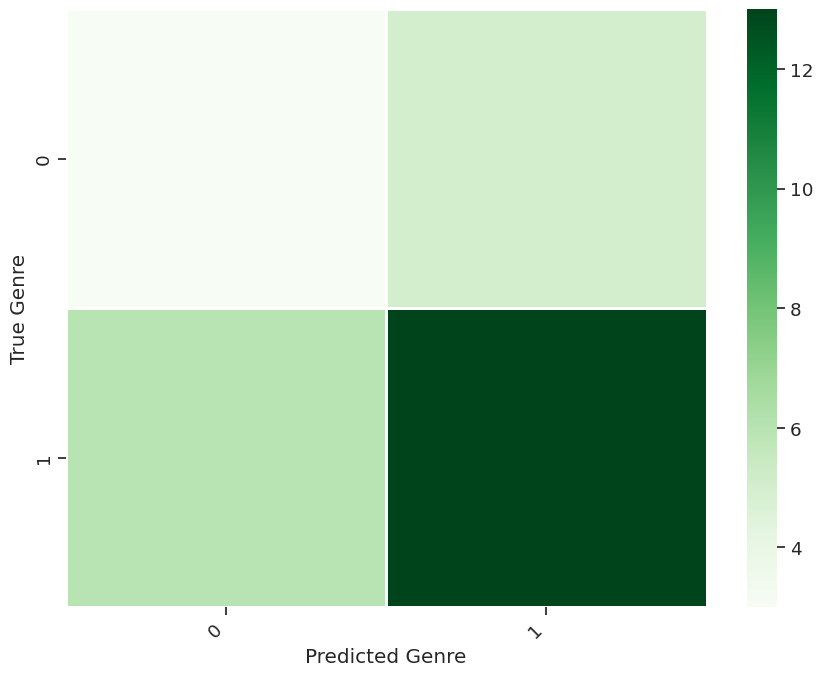

In [46]:
# create heatmap graph for the results

plt.figure(figsize=(9,7))
sns.set(style='ticks', font_scale=1.2)
sns.heatmap(df_wide, linewidths=1, cmap='Greens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the heatmap, we see that the correct prediction of class 1 has the highest f1 accuracy score, while it's the lowest for correctly predicting class 0. It is also important to acknowledge that the predictions and scores also depend on the train_test_split that was performed: different train/test datasets could generate different outcomes.

## 4. Discussion and conclusions

The average f1 accuracy of the prediction after using the BERT model is 0.69, which is higher than 0.59, the baseline performance, but not significantly. For this problem, since I examine the difference between Law and Politics-Government-Activism authors' writing preferences, I consider both class 0 - Law - and class 1 - Politics-Government-Activism - the same and do not consider the score of one class more important than the other. However, the difference between data sizes might affect the output, as discussed earlier, the size for Politics-Government-Activism is almost 2 times bigger than Law, which could lead to biase when training the model as the model would be more inclined to predict Politics-Government-Activism, which is greater in number. The small data size also might be the cause.


According to the fightinwords output, there are indeed differences between occupations such as Church and Law, but since the two occupations Politics-Government-Activism and Law are so closely associated with each other, we can speculate reasonably that the low performance score by BERT could be due to the similarities between topics that authors from these two occupations like to write. However, it is also important to take into account that the process data entails all texts from authors with the same occupation, which means even if some authors with Church occupation don't write about Church at 

Moreover, what I aim to explore in the second half of this exam using BERT is to explore the differences in writing preferences between authors in Law and Politics-Government-Activism authors from between 1789 and 1875. It's first important to acknowledge that what authors like to write solely depend on their personal preferences and might not have any connections with their occupation. The context of these texts might also affect the performance of the BERT model, as texts from earlier periods might have different word choices and meanings that differ from those BERT is trained on.

Some interesting projects that could be explored in the future include a more detailed study of a larger corpus of texts written by authors from Politics-Government-Activism and Law. Some interesting writing differences between the two occupations could potentially be discovered. It would also be helpful to study the backgrounds of authors from these two occupations to gain a better understanding of their writing preferences.

In conclusion, for authors whose primary occupation as Church, Politics-Government-Activism and Law do reflect their occupations in their preferred writing topic, according to fightinwords results, but whether or not their writings relate to each other should be studied in detail by examining individual texts and authors' religious beliefs. The texts written by authors with occupations in Politics-Government-Activism and Law seem to connect for their similar word choices, but the religious influences are not extremely explicit.

By utilizing LLM-based model BERT, I attempted to distinguish texts written by authors in Politics-Government-Activism and Law. The performance was fine but not ideal. I speculate the primary reason for that could be the small corpus, imbalanced data, and similarities between the texts by the two occupations.

Some interesting future projects relevant to this study include: writing preference similarities between authors who have occupations in similar areas and different occupations, difference between authors from Politics-Government-Activism and Law with larger corpus, and some specific context study of the United States between 1789 and 1875.